In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import date, timedelta

In [4]:
top_200_2020 = pd.read_csv('../data/streams_2020-01-01__2021-01-01.csv')
song_features_2020 = pd.read_csv('../data/song_features_2020-01-01__2021-01-01.csv')
top_200_2020 = top_200_2020.merge(song_features_2020, on=['track_id'])
top_200_2020.head(50)

,Position,Track Name,Artist,Streams,URL,date,region,track_id,energy,liveness,tempo,speechiness,acousticness,instrumentalness,danceability,key,duration_ms,loudness,mode,valence
0,1,Dance Monkey,Tones And I,6155025,https://open.spotify.com/track/1rgnBhdG2JDFTbY...,2020-01-01,Global,1rgnBhdG2JDFTbYkYRZAku,0.593,0.17,98.083,0.0976,0.688,0.000161,0.826,6,209755,-6.401,0,0.541
1,1,Dance Monkey,Tones And I,6676697,https://open.spotify.com/track/1rgnBhdG2JDFTbY...,2020-01-02,Global,1rgnBhdG2JDFTbYkYRZAku,0.593,0.17,98.083,0.0976,0.688,0.000161,0.826,6,209755,-6.401,0,0.541
2,1,Dance Monkey,Tones And I,7180575,https://open.spotify.com/track/1rgnBhdG2JDFTbY...,2020-01-03,Global,1rgnBhdG2JDFTbYkYRZAku,0.593,0.17,98.083,0.0976,0.688,0.000161,0.826,6,209755,-6.401,0,0.541
3,1,Dance Monkey,Tones And I,7102715,https://open.spotify.com/track/1rgnBhdG2JDFTbY...,2020-01-04,Global,1rgnBhdG2JDFTbYkYRZAku,0.593,0.17,98.083,0.0976,0.688,0.000161,0.826,6,209755,-6.401,0,0.541
4,1,Dance Monkey,Tones And I,6464401,https://open.spotify.com/track/1rgnBhdG2JDFTbY...,2020-01-05,Global,1rgnBhdG2JDFTbYkYRZAku,0.593,0.17,98.083,0.0976,0.688,0.000161,0.826,6,209755,-6.401,0,0.541
5,1,Dance Monkey,Tones And I,6929767,https://open.spotify.com/track/1rgnBhdG2JDFTbY...,2020-01-06,Global,1rgnBhdG2JDFTbYkYRZAku,0.593,0.17,98.083,0.0976,0.688,0.000161,0.826,6,209755,-6.401,0,0.541
6,1,Dance Monkey,Tones And I,7136680,https://open.spotify.com/track/1rgnBhdG2JDFTbY...,2020-01-07,Global,1rgnBhdG2JDFTbYkYRZAku,0.593,0.17,98.083,0.0976,0.688,0.000161,0.826,6,209755,-6.401,0,0.541
7,1,Dance Monkey,Tones And I,7172395,https://open.spotify.com/track/1rgnBhdG2JDFTbY...,2020-01-08,Global,1rgnBhdG2JDFTbYkYRZAku,0.593,0.17,98.083,0.0976,0.688,0.000161,0.826,6,209755,-6.401,0,0.541
8,1,Dance Monkey,Tones And I,7207358,https://open.spotify.com/track/1rgnBhdG2JDFTbY...,2020-01-09,Global,1rgnBhdG2JDFTbYkYRZAku,0.593,0.17,98.083,0.0976,0.688,0.000161,0.826,6,209755,-6.401,0,0.541
9,1,Dance Monkey,Tones And I,7627455,https://open.spotify.com/track/1rgnBhdG2JDFTbY...,2020-01-10,Global,1rgnBhdG2JDFTbYkYRZAku,0.593,0.17,98.083,0.0976,0.688,0.000161,0.826,6,209755,-6.401,0,0.541


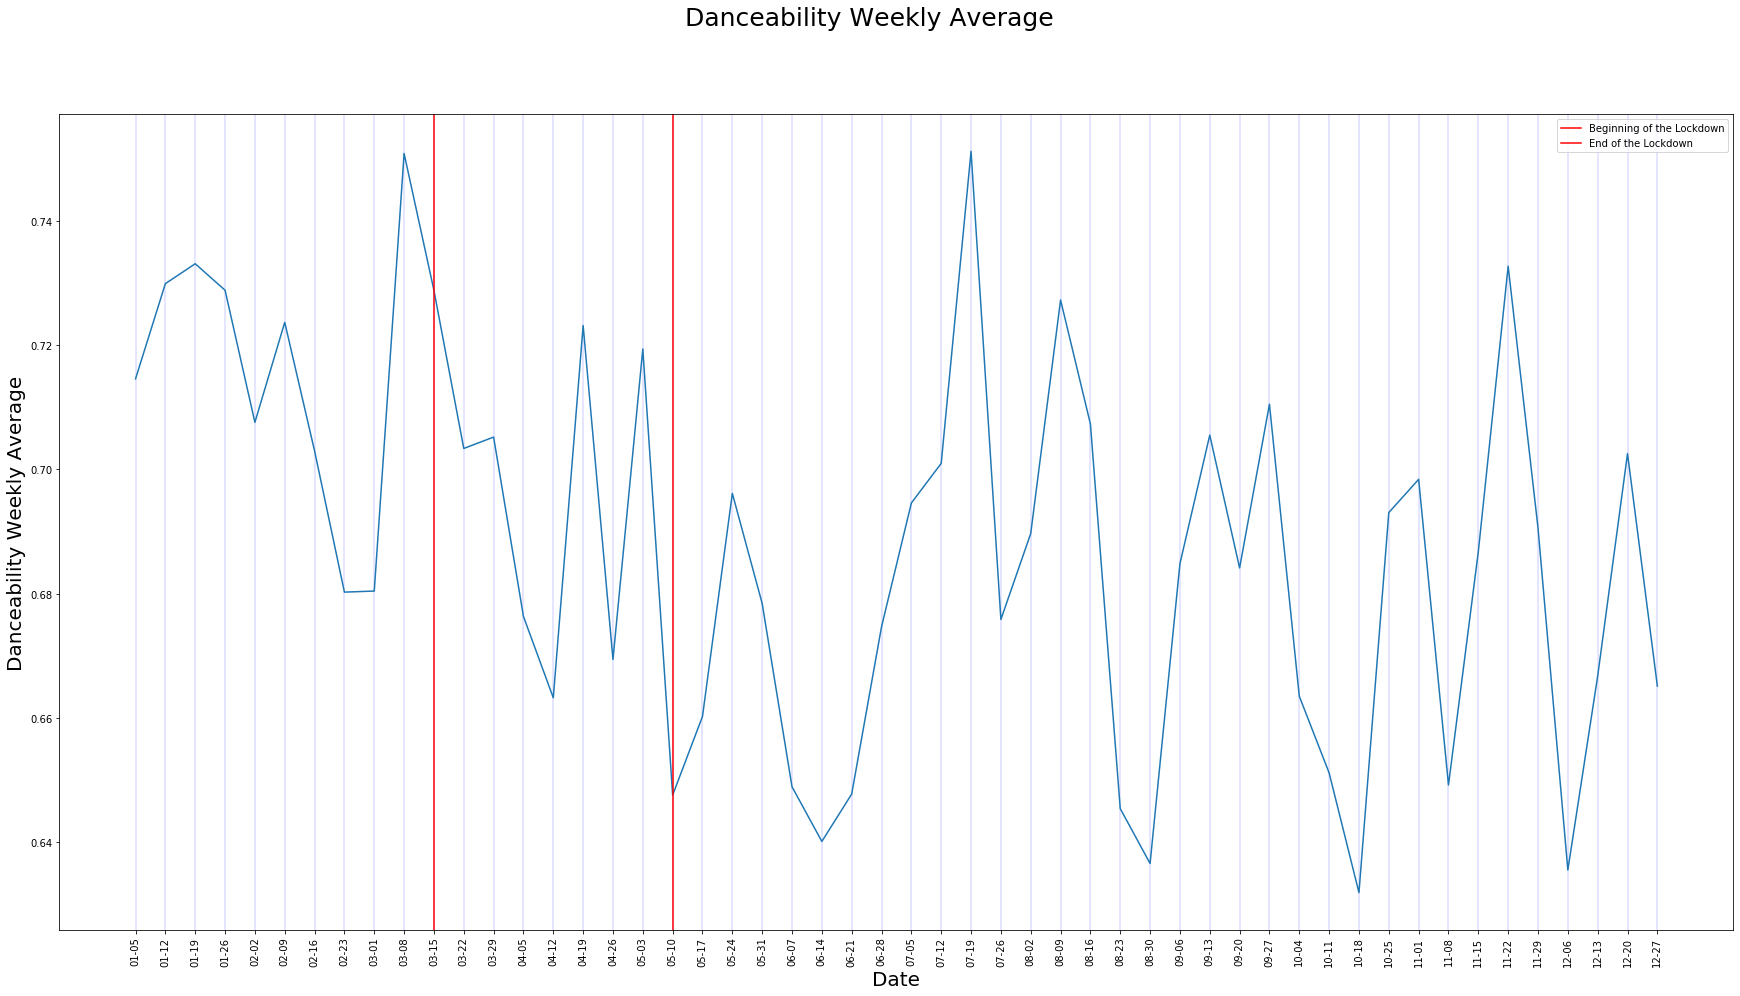

In [10]:
#Danceability parameter

dates = [date for date in top_200_2020['date'].unique()]
danceability_avg = []

for date in dates:
    daily_chart = top_200_2020[top_200_2020['date'] == date]
    danceability_avg.append(daily_chart.nlargest(5, ['Position'])['danceability'].mean())
    
weeks_average = []
count = 0
i = 0
currSum = 0
while i < len(dates):
    currSum += danceability_avg[i]
    count += 1
    if count == 7:
        weeks_average.append(currSum / count)
        currSum = 0
        count = 0
    i += 1

def allsundays(year):
   d = datetime.date(year, 1, 1)
   d += timedelta(days = 6 - d.weekday())
   while d.year == year:
      yield d
      d += timedelta(days = 7)

days = []
for i in allsundays(2020):
    days.append(i.strftime('%m-%d'))
plt.plot([i for i in days], weeks_average)
plt.xticks([i for i in days],  rotation='vertical')
plt.grid(color='b', linestyle='-', linewidth=0.2, axis='x')
plt.rcParams["figure.figsize"] = (30,15)
plt.suptitle('Danceability Weekly Average', fontsize=25)
plt.axvline('03-15', color='Red', label = 'Beginning of the Lockdown')
plt.axvline('05-10', color='Red', label = 'End of the Lockdown')
plt.legend()
plt.xlabel('Date', fontsize=20)
plt.ylabel('Danceability Weekly Average', fontsize=20)
plt.show()

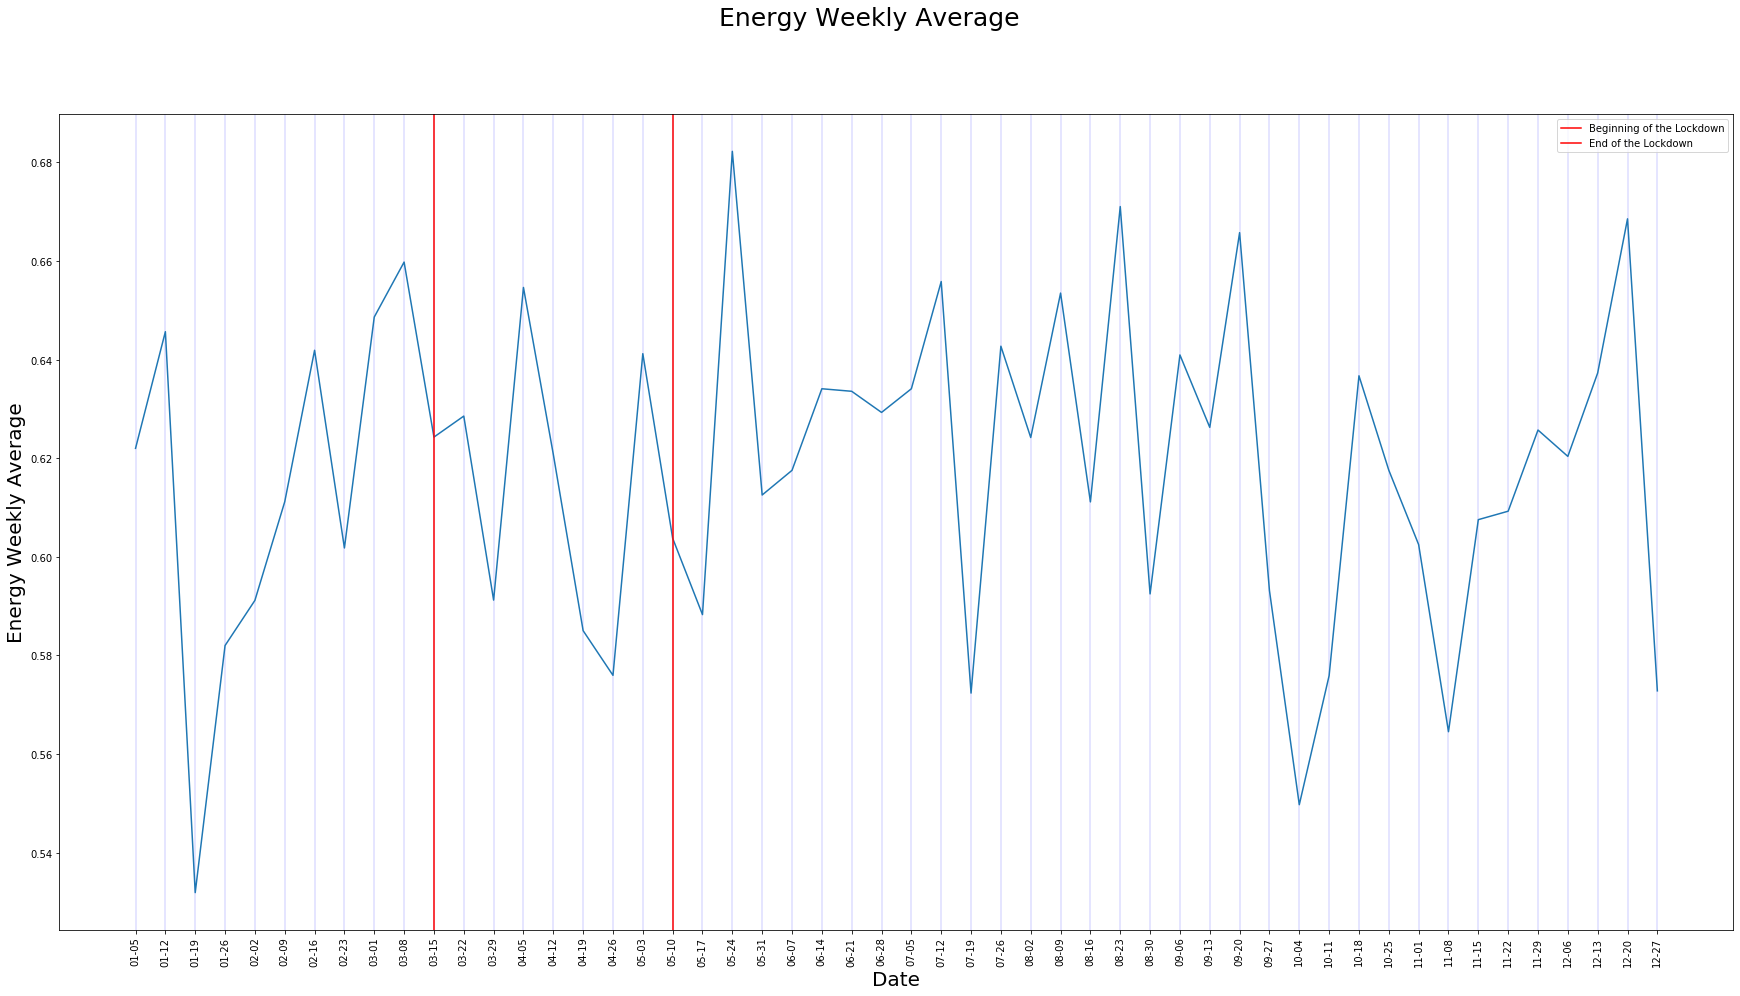

In [11]:
#Energy parameter

dates = [date for date in top_200_2020['date'].unique()]
energy_avg = []

for date in dates:
    daily_chart = top_200_2020[top_200_2020['date'] == date]
    energy_avg.append(daily_chart.nlargest(5, ['Position'])['energy'].mean())
    
weeks_average = []
count = 0
i = 0
currSum = 0
while i < len(dates):
    currSum += energy_avg[i]
    count += 1
    if count == 7:
        weeks_average.append(currSum / count)
        currSum = 0
        count = 0
    i += 1

def allsundays(year):
   d = datetime.date(year, 1, 1)
   d += timedelta(days = 6 - d.weekday())
   while d.year == year:
      yield d
      d += timedelta(days = 7)

days = []
for i in allsundays(2020):
    days.append(i.strftime('%m-%d'))
plt.plot([i for i in days], weeks_average)
plt.xticks([i for i in days],  rotation='vertical')
plt.grid(color='b', linestyle='-', linewidth=0.2, axis='x')
plt.rcParams["figure.figsize"] = (30,15)
plt.suptitle('Energy Weekly Average', fontsize=25)
plt.axvline('03-15', color='Red', label = 'Beginning of the Lockdown')
plt.axvline('05-10', color='Red', label = 'End of the Lockdown')
plt.legend()
plt.xlabel('Date', fontsize=20)
plt.ylabel('Energy Weekly Average', fontsize=20)
plt.show()

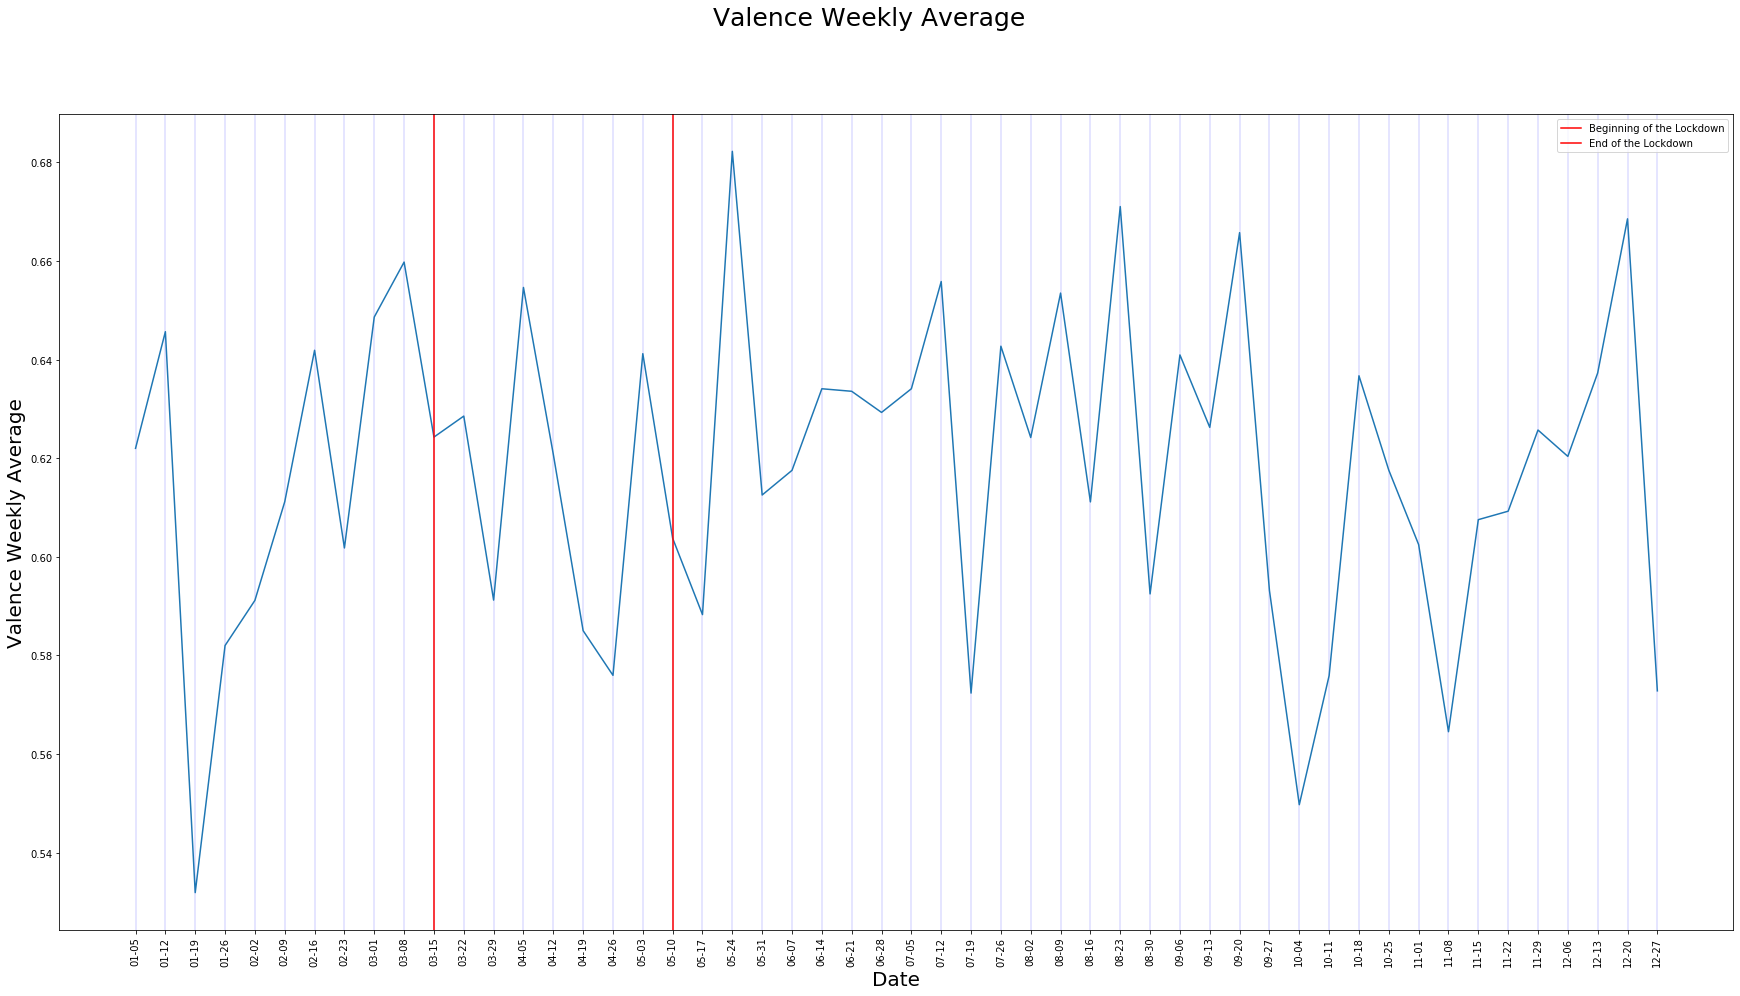

In [12]:
#Valence parameter

dates = [date for date in top_200_2020['date'].unique()]
valence_avg = []

for date in dates:
    daily_chart = top_200_2020[top_200_2020['date'] == date]
    energy_avg.append(daily_chart.nlargest(5, ['Position'])['valence'].mean())
    
weeks_average = []
count = 0
i = 0
currSum = 0
while i < len(dates):
    currSum += energy_avg[i]
    count += 1
    if count == 7:
        weeks_average.append(currSum / count)
        currSum = 0
        count = 0
    i += 1

def allsundays(year):
   d = datetime.date(year, 1, 1)
   d += timedelta(days = 6 - d.weekday())
   while d.year == year:
      yield d
      d += timedelta(days = 7)

days = []
for i in allsundays(2020):
    days.append(i.strftime('%m-%d'))
plt.plot([i for i in days], weeks_average)
plt.xticks([i for i in days],  rotation='vertical')
plt.grid(color='b', linestyle='-', linewidth=0.2, axis='x')
plt.rcParams["figure.figsize"] = (30,15)
plt.suptitle('Valence Weekly Average', fontsize=25)
plt.axvline('03-15', color='Red', label = 'Beginning of the Lockdown')
plt.axvline('05-10', color='Red', label = 'End of the Lockdown')
plt.legend()
plt.xlabel('Date', fontsize=20)
plt.ylabel('Valence Weekly Average', fontsize=20)
plt.show()